# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


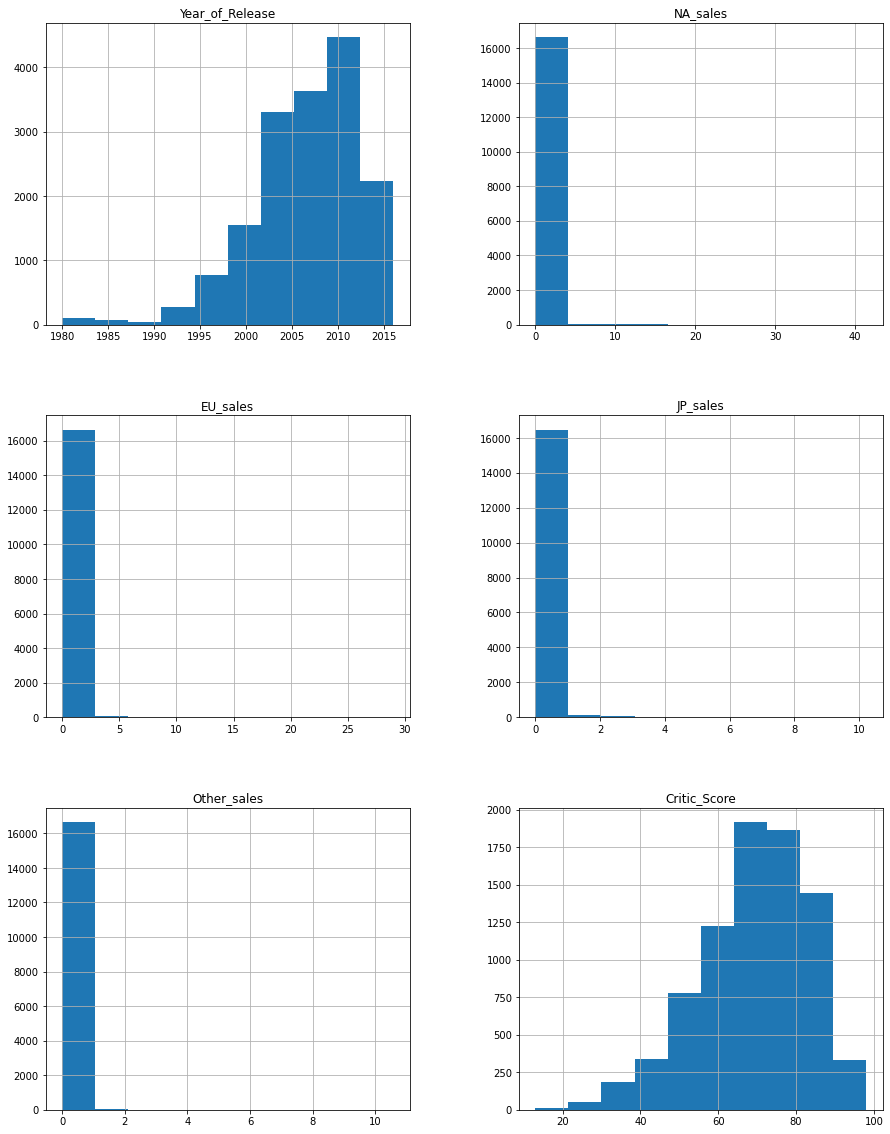

In [3]:
data.info() #общая информация о датафрейме
data.hist(figsize=(15,20)) # выводим гистограмы
data.head(10)

<p>
<div class="alert-info">

Изучил основную информацию о данных в датафрейме.

Из полученной информации можно увидеть множество пропусков, с которыми надо будет поработать. Так же в некоторых столбцах необходимо будет изменить тип данных.

Название столбцов привести к нижнему регистру для удобства и меньшей вероятности ошибиться.

Далее буду выяснять причины пропусков и каким образом стоит их заполнить.</div>

In [4]:
data.columns = data.columns.str.lower()
data.head(10)
#data.rename(columns = {'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'}, inplace = True)
#ручной вариант смены регистра

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<p>
<div class="alert-info">

Изменил с помощью метода str.lower() названия столбцов в нижний регистр.</div>

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int32', errors='ignore')
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')
data['rating'] = data['rating'].fillna('Other')

data.info()
data.head(10)
#data['user_score'].value_counts().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Other
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Other
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Other
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Other


<p>
<div class="alert-info">

В столбце 'user_score' замечено много значений 'tbd', поискав в гугле выяснил, что так обозначаются игры, у которых недостаточно оценок пользователей для того, чтобы стояла оценка. 

Приравнял 'tbd' к значению 'NaN', так как по сути они являются одним и тем же. А затем изменил тип данных на float.

В 'year_of_release' изменил типы данных на int, так как год релиза так же не может быть 2013.4 и так далее, сделал int, чтобы было только целое число.

В 'critic_score' оставил тип float для дальнейшей работы и проведения корреляции.</div>

In [6]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,Other
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,Other


In [7]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])

<p>
<div class="alert-info">

Удалил две строки с играми о которых практически нет информации.

Удалил так же строки с играми, у которых неизвестны даты релиза. Такие игры мешали бы анализу.
    
Остальные пропуски не трогал, так как их изменение может привести к неточным данным.</div>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


In [9]:
data.drop_duplicates()
display(data.duplicated().sum())
data.info()

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


<p>
<div class="alert-info">

Провел проверку дубликатов. Как видно их не оказалось.</div>

In [10]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Other,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Other,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Other,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Other,28.31


<p>
<div class="alert-info">

Создал новый столбец с суммой продаж во всех регионах.</div>

### Исследовательский анализ данных

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


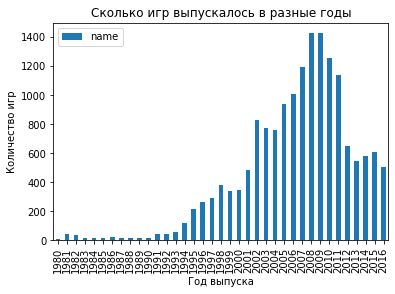

In [11]:
games_years = data.pivot_table(index='year_of_release', values='name', aggfunc = 'count')
display(games_years)
games_years.plot(kind='bar')
plt.title('Cколько игр выпускалось в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

<p>
<div class="alert-info">

Построил сводную таблицу и по ней график для просмотра сколько игр выпускалось в разные годы.

Как видно из таблицы и графика, основной пик на выпуск большого количества игр приходился на 2008 и 2009 годы. Далее количество выпускаемых игр пошло на спад.

Видно что до 1994 года продаж игр было совсем минимально количество. Посмотрев в интернете увидел, что в 1994 году вышла приставка PlayStation 1, Судя по всему с неё и начался скачок на обильное создание игр.

Падение количества выпускаемых игр после 2009 можно охарактеризовать тем, что интернет стал доступен большинству пользователей и он забирал на себя больше внимания пользователей, поэтому спрос на игры сократился. Так же наверняка в это же время стали выпускать множество онлайн игр или браузерных онлайн игр, что так же могло повлиять на спад.

Не все данные из периода важны, я бы предпочел работать либо с данными 1994-2016, так как в этот период произошел большой скачок на игры и затем падение. Либо с данными 2012-2016, так как после спада выпускаемости игр в этот период пришла стабильность по выпускаемым играм из года в год.</div>

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


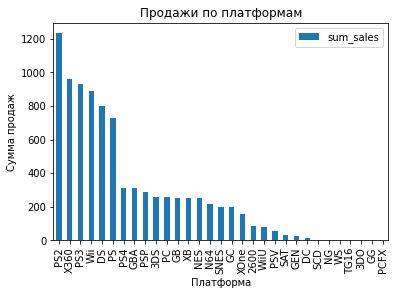

In [12]:
platform_sales = data.pivot_table(index='platform', values='sum_sales', aggfunc = 'sum')
platform_sales = platform_sales.sort_values(by = 'sum_sales', ascending = False)
display(platform_sales)
platform_sales.plot(kind='bar')
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

<p>
<div class="alert-info">


Как можно увидеть из сводной таблицы и графика выше - больше всего продаж у 6 платформ, их и будем рассматривать, как платформы с наибольшими суммарными продажами.</div>

<AxesSubplot:xlabel='year_of_release'>

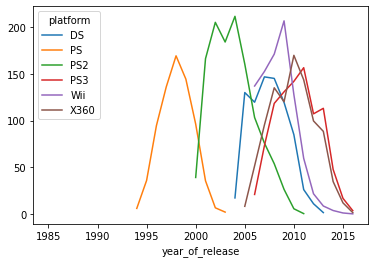

In [13]:
best_platform = platform_sales.index[:6].tolist()
data.query('platform in @best_platform').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot()

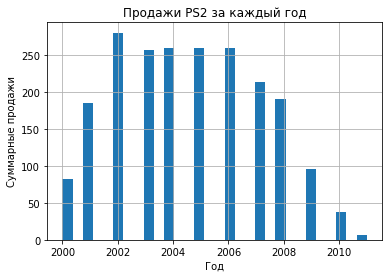

In [14]:
data[data['platform'] == 'PS2']['year_of_release'].hist(bins=30)
plt.title('Продажи PS2 за каждый год')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

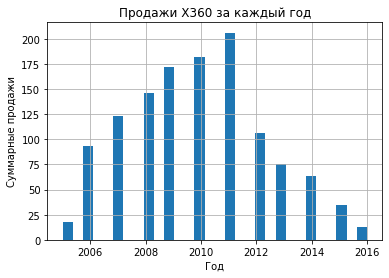

In [15]:
data[data['platform'] == 'X360']['year_of_release'].hist(bins=30)
plt.title('Продажи X360 за каждый год')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

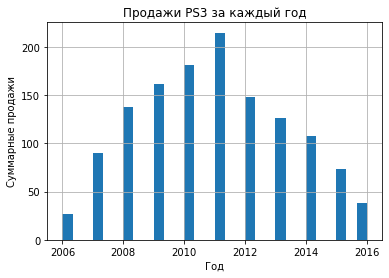

In [16]:
data[data['platform'] == 'PS3']['year_of_release'].hist(bins=30)
plt.title('Продажи PS3 за каждый год')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

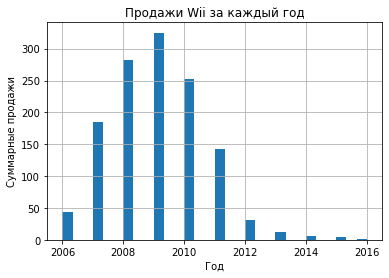

In [17]:
data[data['platform'] == 'Wii']['year_of_release'].hist(bins=30)
plt.title('Продажи Wii за каждый год')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

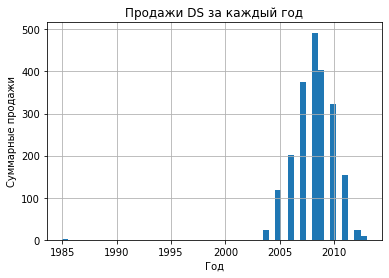

In [18]:
data[data['platform'] == 'DS']['year_of_release'].hist(bins=50)
plt.title('Продажи DS за каждый год')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

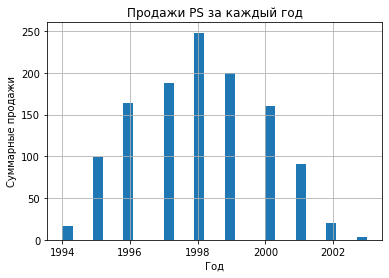

In [19]:
data[data['platform'] == 'PS']['year_of_release'].hist(bins=30)
plt.title('Продажи PS за каждый год')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

<p>
<div class="alert-info">

Вывел общий график по топ-6 платформам с наибольшими продажами ежегодно и отдельные подробные графики соотношения продаж и года.

Как видно из графиков, платформы обычно актуальны от 6 до 10 лет. Самое наименьшее количество лет актуальности замечено у Wii, а больше всего актуальной оставалась ps2 и ps3. Но даже учитывая что у PS2 больше всего продаж, её пик популярности упал и она уже не актуальна, при это большее предпоочтение я бы отдал PS3, так как её продажи ещё не упали и она актуальная платформа на 2016 год, а значит вполне может побить рекорд актуальности остальных платформ.

На тех же PS, PS2, PS3 отчетливо видно на первом графике как одно поколение сменяется другим. PS перестает быть актуальной примерно в 2001 году, PS 2 как раз набирает популярность с 2002 года.</div>

In [20]:
actual_period = data.query('year_of_release >= 2012')
actual_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  sum_sales        2886 non-null   float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 284.7+ KB


<p>
<div class="alert-info">

Смотря на график по выпущенным играм в разные годы, я считаю что актуальный период будет 2012-2016, так как мы прогнозируем данные на 2017 год. Более старые данные будут не актуальны, так как сначала был подъём по выпущенным играм, а затем резкое падение, с 2012 года график более-менее стабилен.

Так же с 2012 по 2016 большинство платформ актуальны на 2017 год, что так же поможет спрогнозировать данные.

В новой переменной не учитываются данные за прошлые периоды. Это так же можно увидеть по выведенной информаци, данных стало намного меньше.</div>

,sum_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


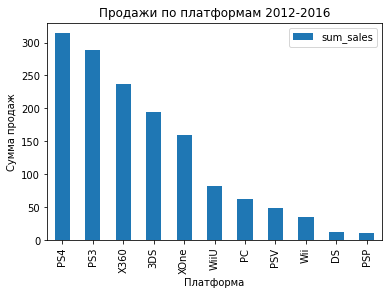

In [21]:
actual_platform_sales = actual_period.pivot_table(index='platform', values='sum_sales', aggfunc = 'sum')
actual_platform_sales = actual_platform_sales.sort_values(by = 'sum_sales', ascending = False)
display(actual_platform_sales)
actual_platform_sales.plot(kind='bar')
plt.title('Продажи по платформам 2012-2016')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

<AxesSubplot:xlabel='year_of_release'>

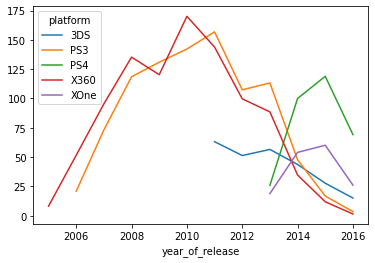

In [22]:
best_platform_actual = actual_platform_sales.index[:5].tolist()
data.query('platform in @best_platform_actual').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot()

<p>
<div class="alert-info">

Здесь можно выделить топ-5 платформ с самыми большими суммарными продажами. Это PS4, PS3, X360, 3DS, XOne.
    
По графику можно увидеть что по продажам растут игры для PS4 и для XOne, так как это платформы нового поколения, и соответвтенно видно как падают продажи PS3 и X360, поэтому PS4 и XOne можно назвать потенциально прибыльными платформами. Помимо этого видно что уже менее актуальна WiiU и падают продажи 3DS.
    
Такие приставки как PSP или DS уже совсем потеряли свою актуальность, но в то же время стал набирать обороты популярности PC.</div>

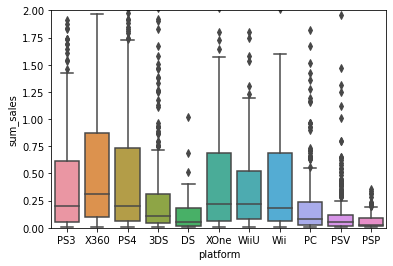

In [23]:
boxplot = sns.boxplot(data = actual_period, x='platform', y='sum_sales').set_ylim(0,2)

<p>
<div class="alert-info">

Из диаграмм можно выделить следующее:

Самая большая граница предела, за которой появляются аномалии у X360 - около 1.9 млн.
Самая маленькая у PSP - около 0.20 млн.

У остальных же платформ верхняя граница на уровне 1.20 - 1.75 млн.

У самых топовых платформ медиана примерно на уровне 0.20-0.25 млн.

Самая маленькая медиана у PSP, которая близка к 0, у DS и PSV, которые около 0.05 млн.</div>

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

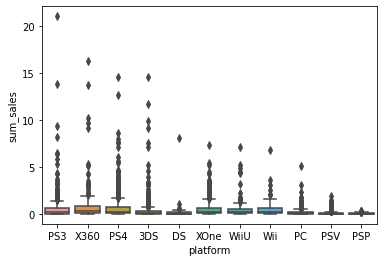

In [24]:
sns.boxplot(data = actual_period, x='platform', y='sum_sales')

<p>
<div class="alert-info">

А здесь уже видим более общую картину, куда уходят аномальные значения.</div>

In [25]:
best_platform_actual

['PS4', 'PS3', 'X360', '3DS', 'XOne']

(0.0, 2.0)

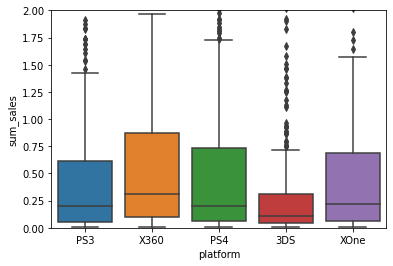

In [26]:
top5_actual = actual_period.query('platform in @best_platform_actual')
top5_actual
sns.boxplot(data = top5_actual, x='platform', y='sum_sales').set_ylim(0,2)

<p>
<div class="alert-info">
    
Здесь я выделил в отдельные диаграммы топ-5 платформ, о которых шла речь ранее.

Можно так же отдельно выделить что у топ-5 платформ медиана около 0.15 - 0.35 млн.

А верхняя граница предела от 0.75 до 1.9 млн.</div>

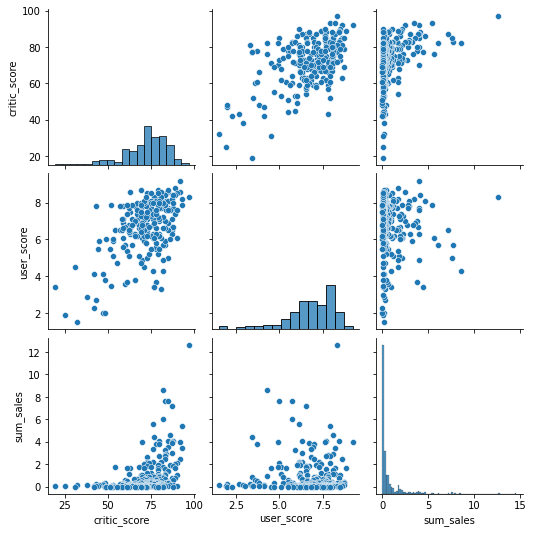

In [27]:
actual_period_PS4 = actual_period.query('platform == "PS4"')
sns.pairplot(actual_period_PS4[['critic_score', 'user_score', 'sum_sales']])

<p>
<div class="alert-info">
    
Провел исследование, взяв одну популярную платформу - PS4 и проверил, как влияют на продажи оценки критиков и пользователей.

Как видно из графика - чем выше средняя оценка, тем больше продаж игр для платформы.

Видно так же, что оценки критиков чуть больше имеют влияния на суммарные продажи игр для платформы.

Из этого графика можно сделать вывод, что оценки как критиков, так и пользователей вполне могут влиять на продажи. Чем выше средняя оценка за игру, тем больше продаж будет на платформе.</div>

In [28]:
actual_period_PS4['user_score'].corr(actual_period_PS4['sum_sales'])

-0.031957110204556376

In [29]:
actual_period_PS4['critic_score'].corr(actual_period_PS4['sum_sales'])

0.40656790206178095

<p>
<div class="alert-info">

Посчитав корреляции, можно сделать следующие выводы:

1) Корреляция между оценками пользователей и общими продажами - отрицательна, но при это практически равна нулю. Это значит что оценка пользователей не так сильно влияет на продажи.
    
2) Однако видя корреляцию оценок критиков и общих продаж - видим положительную, умеренную корреляцию, что может значить лишь то, что чем выше оценка критика, тем больше продаж.
</div>

<p>
<div class="alert-info">

Проверим аналогично диаграммой рассеяния и корреляцией данные по остальным платформам нашего топ-5 платформ.</div>

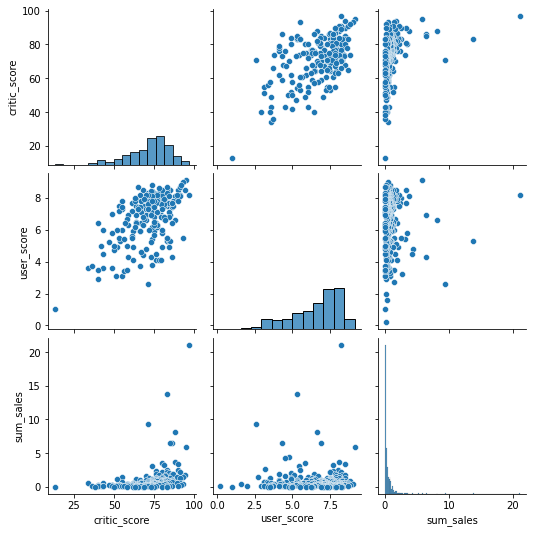

In [30]:
actual_period_PS3 = actual_period.query('platform == "PS3"')
sns.pairplot(actual_period_PS3[['critic_score', 'user_score', 'sum_sales']])

In [31]:
actual_period_PS3['user_score'].corr(actual_period_PS3['sum_sales'])

-0.005143522887113828

In [32]:
actual_period_PS3['critic_score'].corr(actual_period_PS3['sum_sales'])

0.3314972592629587

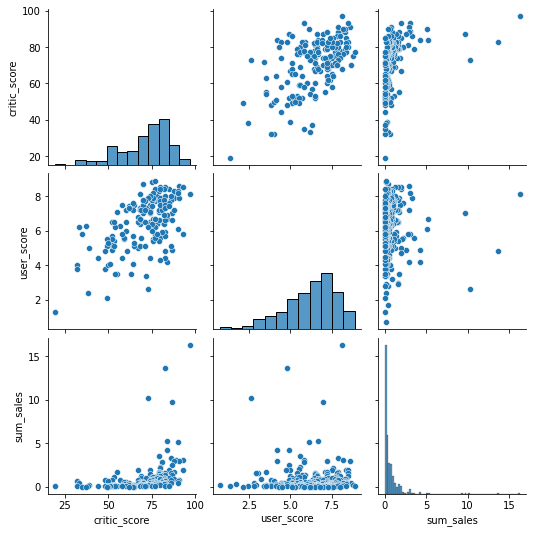

In [33]:
actual_period_X360 = actual_period.query('platform == "X360"')
sns.pairplot(actual_period_X360[['critic_score', 'user_score', 'sum_sales']])

In [34]:
actual_period_X360['user_score'].corr(actual_period_X360['sum_sales'])

0.006163978646213326

In [35]:
actual_period_X360['critic_score'].corr(actual_period_X360['sum_sales'])

0.3605734888507336

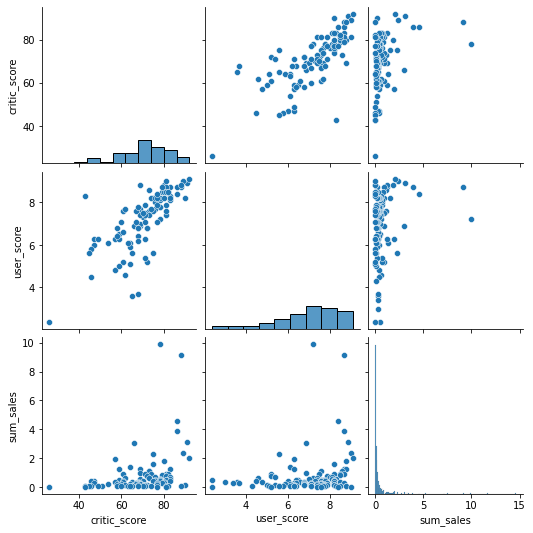

In [36]:
actual_period_3DS = actual_period.query('platform == "3DS"')
sns.pairplot(actual_period_3DS[['critic_score', 'user_score', 'sum_sales']])

In [37]:
actual_period_3DS['user_score'].corr(actual_period_3DS['sum_sales'])

0.19758263411038599

In [38]:
actual_period_3DS['critic_score'].corr(actual_period_3DS['sum_sales'])

0.3208028695360785

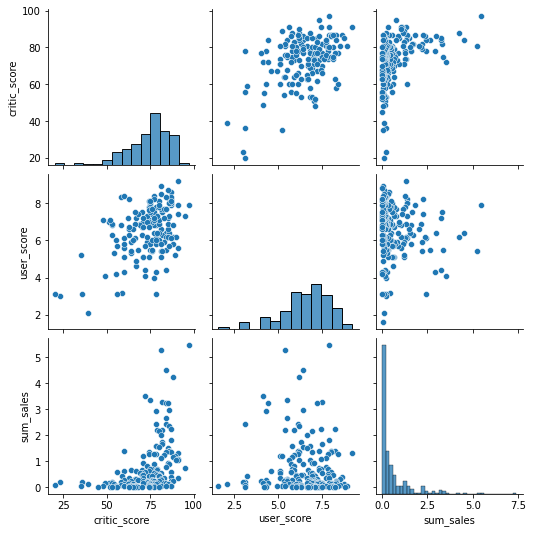

In [39]:
actual_period_XOne = actual_period.query('platform == "XOne"')
sns.pairplot(actual_period_XOne[['critic_score', 'user_score', 'sum_sales']])

In [40]:
actual_period_XOne['user_score'].corr(actual_period_XOne['sum_sales'])

-0.06892505328279414

In [41]:
actual_period_XOne['critic_score'].corr(actual_period_XOne['sum_sales'])

0.4169983280084017

<p>
<div class="alert-info">
    
Проверив остальные платформы, можно заметить, что у всех данные в целом очень схожи. Единственное, можно отметить данные 3DS, так как её корреляция с оценками пользователей выделяется от других платформ, а то есть, здесь уже видно, что чем выше оценка пользователя - тем выше продажи.

Это можно связать с тем, что на данную платформу приходится мало критиков, потому пользовательские оценки так же ценятся. Так же возможно на платформу просто напросто мало игр, и оценок пользователей намного больше и они пересиливают оценки критиков. Либо платформа популярна в основном среди пользователей, поэтому люди больше ориентируются на пользовательские оценки, чем на оценки критиков.</div>

,sum_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


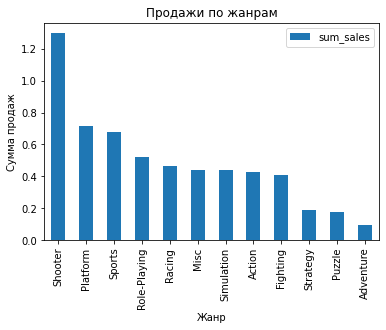

In [42]:
actual_period_genre = actual_period.pivot_table(index = 'genre', values = 'sum_sales').sort_values(by = 'sum_sales', ascending = False)
display(actual_period_genre)
actual_period_genre.plot(kind='bar')
plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()

<p>
<div class="alert-info">

Просмотрел на общее распределение игр по жанрам и их общую сумму продаж. Самыми прибыльными жанрами периода 2012-2016 являются шутеры, платформеры, спортивные игры, рпг и гонки. 

В данных выделяется большое количество продаж игр жанра шутер. Такое количество продаж шутеров может быть связано с большим количеством выхода новинок шутеров в эти годы.
    
А так же в данных выделяются 3 жанра с наименьшими продажами - стретигии, пазлы и приключения.

Хоть и крайне странно видеть приключенческие игры с наименьшим количеством продаж, но изучив данные стало ясно, как шутеры попали в топ по продажам, за счёт серии игр 'Call of Duty', которая в свою очередь является как одиночной игрой, так и мультиплеерной, большинству игроков такие игры нравятся больше всего исходя из данных.    
</div>

### Составьте портрет пользователя каждого региона

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


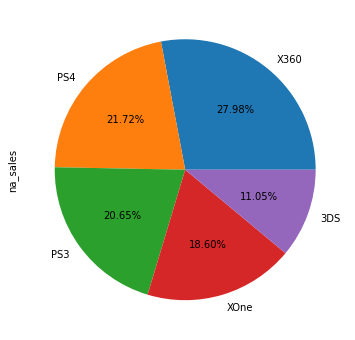

In [43]:
na_platform_sale = actual_period.pivot_table(index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
display(na_platform_sale)
na_platform_sale.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend=False, subplots=True)
plt.show()

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


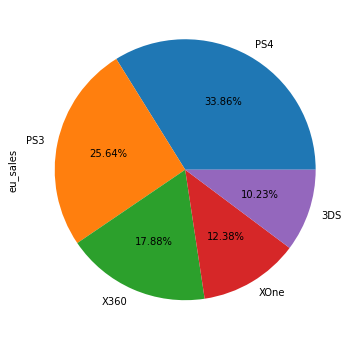

In [44]:
eu_platform_sale = actual_period.pivot_table(index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
display(eu_platform_sale)
eu_platform_sale.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend=False, subplots=True)
plt.show()

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


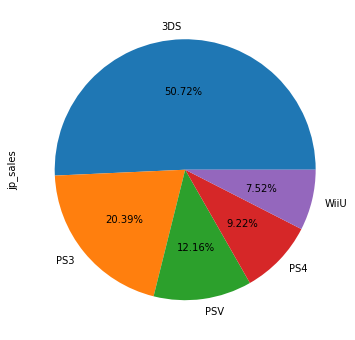

In [45]:
jp_platform_sale = actual_period.pivot_table(index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
display(jp_platform_sale)
jp_platform_sale.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend=False, subplots=True)
plt.show()

<p>
<div class="alert-info">

Определил топ-5 платформ по общим продажам в каждом регионе:
1. Северная Америка - X360, PS4, PS3, XOne, 3DS
2. Европа - PS4, PS3, X360, XOne, 3DS
3. Япония - 3DS, PS3, PSV, PS4, WiiU
    
В Северной Америке самая большая доля продаж приходится на X360, которая заменяется на новое поколение XOne. Охарактеризовать данную долю можно тем, что данная платформа в Северной Америке наиболее актуальна, так как множество сервисов доступных на платформе работают только в Северной Америке. Так же X360 и XOne являются платформами компании Microsoft, которая региональна для Северной Америки.
    
Следующий специфичный регион это Япония, самая большая доля продаж приходится на платформу 3DS, так как эта приставка популярна именно в этом регионе, большинство пользователей региона предпочитают данную платформу. 3DS принадлежит компании Nintendo, которая так же региональна для Японии. Игры для приставки так же создают в этом регионе. Далее в топе идут такие платформы как PS, которые принадлежат компании Sony, которая так же является региональной. В прочем весь топ-5 платформ в Японии является региональным. Поэтому можно сделать вывод что пользователи в Японии больше предпочитают региональный продукт.
    
В Европе же нет своих региональных компаний, которые создают платформы, поэтому у них спрос на самые популярные платформы Северной Америки и Японии.
</div>

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


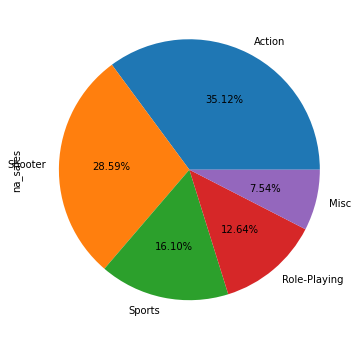

In [46]:
na_genre_sale = actual_period.pivot_table(index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
display(na_genre_sale)
na_genre_sale.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend=False, subplots=True)
plt.show()

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


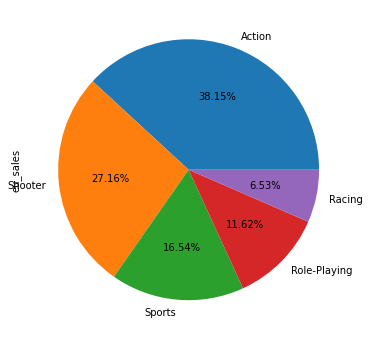

In [47]:
eu_genre_sale = actual_period.pivot_table(index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
display(eu_genre_sale)
eu_genre_sale.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend=False, subplots=True)
plt.show()

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


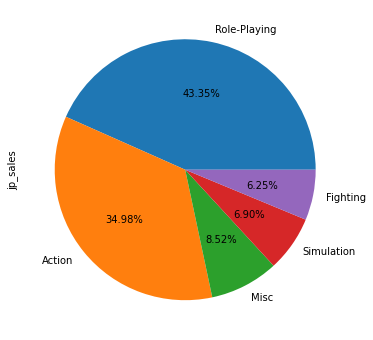

In [48]:
jp_genre_sale = actual_period.pivot_table(index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
display(jp_genre_sale)
jp_genre_sale.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend=False, subplots=True)
plt.show()

<p>
<div class="alert-info">

Определил топ-5 жанров по общим продажам в каждом регионе:
1. Северная Америка - Action, Shooter, Sports, Role-Playing, Misc
2. Европа - Action, Shooter, Sports, Role-Playing, Racing
3. Япония - Role-Playing, Action, Misc, Simulation, Fighting
    
По данной статистике можно сразу соотнести схожесть в интересах жанров у Северной Америки и Европы, а то есть у обоих регионов в топе жанры Action, Shooter, Sports.

В Японии же вновь есть отличия по предпочитаемым жанрам. Самые предпочитаемые жанры в Японии -  Role-Playing, Action, Misc.
    
Из этих данных видно, что в Японии больше любят игры с головоломками и РПГ. В Северной Америке и Европе больше любят шутеры и экшн.
    
В данных так же можно увидеть что общие жанры в топ-5 у всех регионов - Action, так как это один из самых популярных жанров. Отдельно можно ещё отметить жанр - Shooter.

</div>

,na_sales
rating,
M,231.57
E,114.37
Other,103.31
E10+,75.70
T,66.02


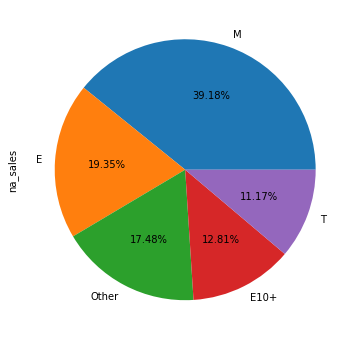

In [49]:
na_rating_sale = actual_period.pivot_table(index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
display(na_rating_sale)
na_rating_sale.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend=False, subplots=True)
plt.show()

,eu_sales
rating,
M,193.96
E,113.03
Other,91.50
E10+,55.37
T,52.96


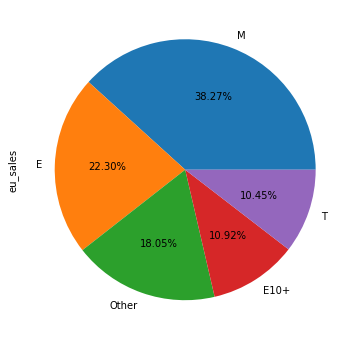

In [50]:
eu_rating_sale = actual_period.pivot_table(index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
display(eu_rating_sale)
eu_rating_sale.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend=False, subplots=True)
plt.show()

,jp_sales
rating,
Other,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


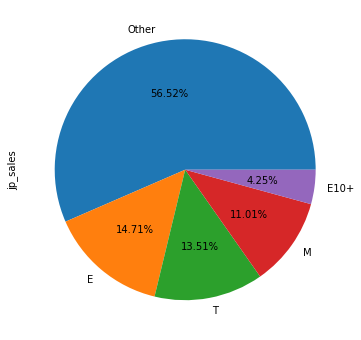

In [51]:
jp_rating_sale = actual_period.pivot_table(index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
display(jp_rating_sale)
jp_rating_sale.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend=False, subplots=True)
plt.show()

<p>
<div class="alert-info">


Для ознакомления напишу расшифровку каждого рейтинга:    
    
E - Подходит для всех возрастов.

E10+ - Для всех от 10 лет и старше. 

T - Игра подходит для лиц от 13 лет

M - Материалы игры не подходят для лиц младше 17 лет
</div>

<p>
<div class="alert-info">


Теперь перейдём к анализу влияния рейтинга ESRB на продажи в каждом регионе.
    
Определил топ рейтинга ESRB по общим продажам в каждом регионе:
1. Северная Америка - M, E, Other, E10+, T
2. Европа - M, E, Other, E10+, T
3. Япония - Other, E, T, M, E10+
    
Да, рейтинг ESRB влияет на продажи в каждом регионе, объясню почему.
    
Как видно из графиков, у нас вновь очень похожи интересы Северной Америки и Европы, топ спроса игр по рейтингу одинаков. Северная Америка и Европа больше предпочитают игры рейтинга для взрослых, от 17 и старше. Данные регионы сконцетрировались на продажах игр в основном для взрослого поколения.
    
В Японии же видим другую ситуацию, первое место рейтингов занимает Other - это значит что игры без чёткого рейтинга, и мы точно не можем сказать какой тут рейтинг. Но по чётким показателям первое место занимает рейтинг E - то есть игры для всех возрастов. Данный регион сконцетрировался на всех поколениях.
</div>

### Проверьте гипотезы

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

<p>
<div class="alert-info">

H_0: Средние пользовательские рейтинги платформ XOne и PC равны.

H_1: Средние пользовательские рейтинги платформ XOne и PC не равны.
</div>

In [52]:
rating_xbox = actual_period[(actual_period['platform'] == 'XOne') & (actual_period['user_score'] > 0)]['user_score']
rating_pc = actual_period[(actual_period['platform'] == 'PC') & (actual_period['user_score'] > 0)]['user_score']

In [53]:

alpha = 0.05

results = st.ttest_ind(rating_xbox, rating_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


<p>
<div class="alert-info">


Гипотеза принята, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
</div>

**5.2 Средние пользовательские рейтинги жанров Action и Sports разные**

<p>
<div class="alert-info">


H_0: Средние пользовательские рейтинги жанров Action и Sports равны.

H_1: Средние пользовательские рейтинги жанров Action и Sports не равны.
</div>

In [54]:
rating_action = actual_period[(actual_period['genre'] == 'Action') & (actual_period['user_score'] > 0)]['user_score']
rating_sports = actual_period[(actual_period['genre'] == 'Sports') & (actual_period['user_score'] > 0)]['user_score']

In [55]:
alpha = 0.05

results = st.ttest_ind(rating_action, rating_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


<p>
<div class="alert-info">


Гипотеза принята, средние пользовательские рейтинги жанров Action и Sports разные.
</div>

### Общий вывод

<p>
<div class="alert-info">

    
В данных изначально было замечено много пропусков, которые в дальнейшем я проработал. Проверил так же данные на дубликаты и таковых не было замечено.
    
**Итоговый вывод**

1. Актуальными данными для прогнозирования продаж на 2017 год являлись продажи за 2012-2016 год.
    
2. Выяснил что платформы обычно актуальны 6-10 лет, так как PS3 и X360 начали идти на спад и им пришли на замену PS4 и XOne, то именно в их сторону надо прогнозировать продажи. Так же актуальной является платформа 3DS.
    
3. Пик по выпуску игр был в 2008 и 2009 годах, с 2010 года выпуск игр пошел на спад, предположительно из-за доступности интернета, онлайн игр, социальных сетей. Но с 2012 года количество выпускаемых игр стабилизировалось.
    
4. Больше всего продаж за всё время было на платформах PS2 и X360.
    
5. В Северной Америке и в Европе чаще играют в Action и в Shooter. В Японии сильно отдичается игровая идустрия, в основном играют в Role-Playing.

6. В Северной Америке чаще используют платформы своего регионального производства, в Японии используют платформы своего регионалного производства, а в Европе используют платформы обоих регионов.
    
7. В Северной Америке и Европе зачастую берут игры для аудитории старше 17 лет, в Японии для любой аудитории.
    
8. В целом есть все основания полагать что рынок игр будет продолжать падать.
    
Рекомендации и прогноз на 2017 год:

Стоит акцентировать внимание на игры для платформ PS4, XOne, 3DS. Сфокусироваться на жанрах Action, Shooter и Role-Playing. Чаще подбирать игры для аудитории старше 17 лет. В Японии быть готовым работать по региональным предпочтениям.
    
</div>